In [ ]:
!pip3 install opendatasets

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [2]:
# Diabetics
#od.download('https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset')
# Breast Cancer Data
#od.download('https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data')

In [47]:
df1 = pd.read_csv('diabetes.csv')
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0
3,Female,36.0,0.0,0.0,current,23.45,5.0,NaN,0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0


In [48]:
df1.isnull().sum()

gender                 2
age                    5
hypertension           1
heart_disease          1
smoking_history        0
bmi                    2
HbA1c_level            0
blood_glucose_level    1
diabetes               0
dtype: int64

###  1. Deleting Rows

In [49]:
df1.shape

(100000, 9)

In [52]:
df1.dropna(inplace=True)

In [53]:
df1.shape

(99990, 9)

### 2. Replaceing with Median / Mean / Mode Value in Numerical Missing Values

In [54]:
# Replacing with mean value
df1 = pd.read_csv('diabetes.csv')
#df1.head()
#df1.info()
print(f"Mean : {df1.age.mean()}")
df1.age.replace(np.NaN, df1.age.mean(),inplace=True)

Mean : 41.88645032251612


In [55]:
# Replacing with median value
df1 = pd.read_csv('diabetes.csv')
#df1.head()
#df1.info()
print(f"Median : {df1.age.median()}")
df1.age.replace(np.NaN, df1.age.median(),inplace=True)

Median : 43.0


In [56]:
# Replacing with mode value
df1 = pd.read_csv('diabetes.csv')
#df1.head()
#df1.info()
print(f"Mode : {df1.age.mode()[0]}")
df1.age.replace(np.NaN, df1.age.mode()[0],inplace=True)

Mode : 80.0


In [57]:
#print(df1.age.sort_values().to_string())

### 3.Assigning with a Unique Category


In [58]:
df1 = pd.read_csv('diabetes.csv')
#df1.head()
#df1.info()
df1.gender.fillna('U',inplace=True)

### 4. Outlier Detection : (Field/ Attributes/ Features /  )

In [60]:
df1 = pd.read_csv('diabetes.csv')
df1.dropna(inplace=True)

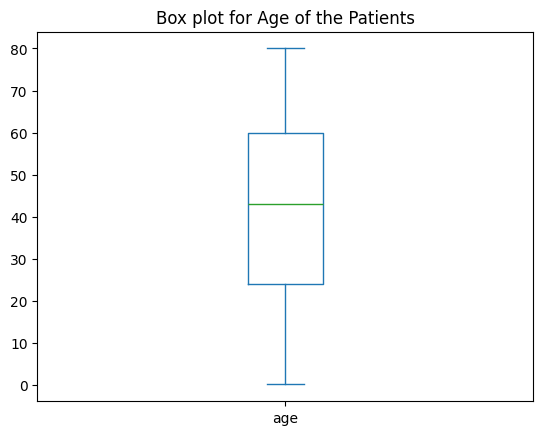

In [61]:
df1['age'].plot(kind='box', title='Box plot for Age of the Patients') 
plt.show() 

[]

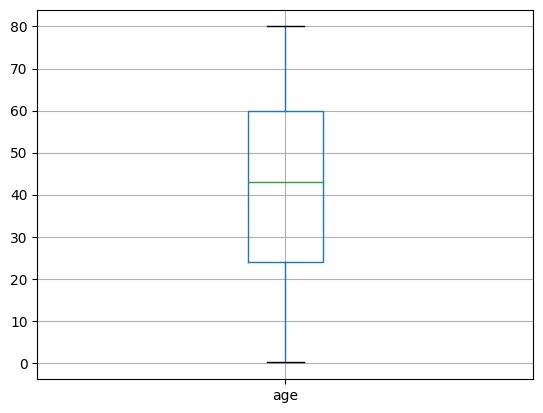

In [62]:
bxplot = df1.boxplot(column='age') 
bxplot.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x2a395d490>,
 'caps': [<matplotlib.lines.Line2D at 0x2a395d9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a29dfa60>],
 'medians': [<matplotlib.lines.Line2D at 0x2a395df10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a394e1f0>],
 'means': []}

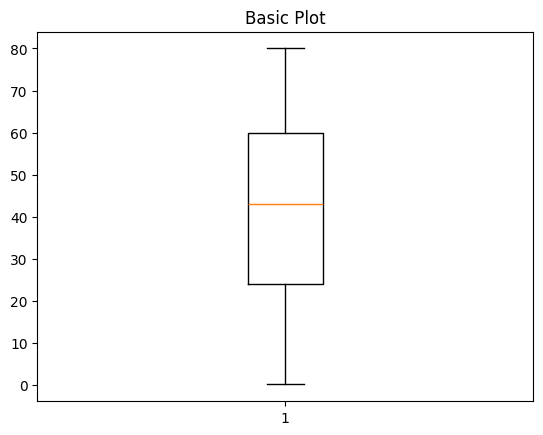

In [63]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df1.age)

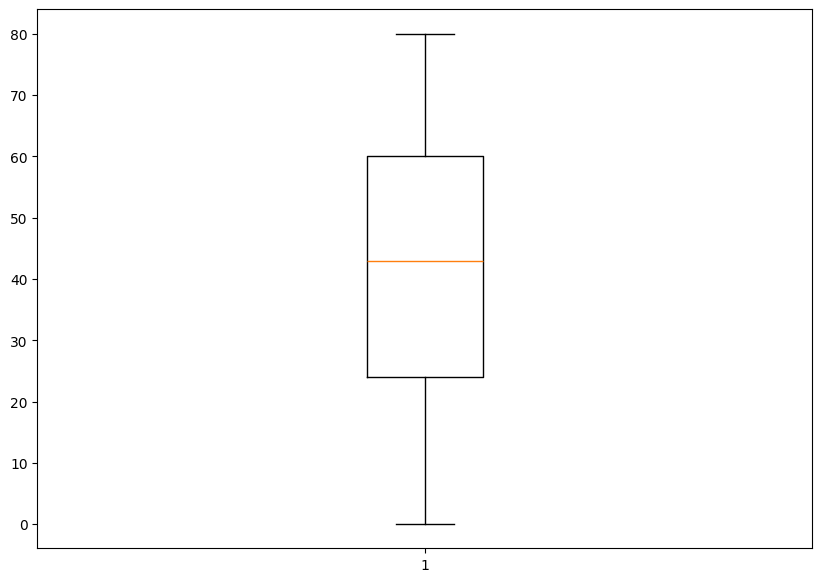

In [64]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df1.age)
 
# show plot
plt.show()

In [13]:
Q1 = df1.age.describe()['25%'] 
Q3 = df1.age.describe()['75%'] 
IQR = Q3-Q1
LT = Q1 - 1.5 * IQR
UT = Q3 + 1.5 * IQR
print(f"Upper Threshold: {UT}  and Lower Threshold: {LT}")
print(f"Outlier Below Lower threshold: {(df1.age < LT).sum()}")
print(f"Outlier Above Upper threshold: {(df1.age > UT).sum()}")

Upper Theshold: 114.0  and Lower Theshold: -30.0
Outlier Below Lower threshold: 0
Outlier Above Upper threshold: 0


<Axes: xlabel='age'>

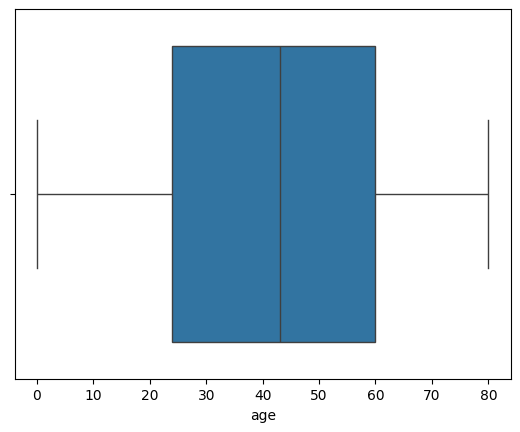

In [14]:
#df1.plot.box(column='age',by='gender')
sns.boxplot(data=df1, x = 'age')

In [15]:
# Zscore
"""
zscore = (value - mean / standard Deviation)
- A positive z-score says the data point is above average.
- A negative z-score says the data point is below average.
- A z-score close to 0 says the data point is close to average.
- A data point can be considered unusual if its z-score is above 3 or below -3
"""
age_mean = df1.age.mean()
age_std = df1.age.std()
age_zscore = (df1.age - age_mean) / age_std
print(f"Outlier below zscore < -3: {(age_zscore < -3).sum()}")
print(f"Outlier above zscore  > 3: {(age_zscore > 3).sum()}")

Outlier below zscore < -3: 0
Outlier above zscore  > 3: 0


In [16]:
Q1 = df1.HbA1c_level.describe()['25%'] 
Q3 = df1.HbA1c_level.describe()['75%'] 
IQR = Q3-Q1
LT = Q1 - 1.5 * IQR
UT = Q3 + 1.5 * IQR
print(f"Upper Theshold: {UT}  and Lower Theshold: {LT}")
print(f"Outlier Below Lower threshold: {(df1.HbA1c_level < LT).sum()}")
print(f"Outlier Above Upper threshold: {(df1.HbA1c_level > UT).sum()}")

Upper Theshold: 8.3  and Lower Theshold: 2.6999999999999993
Outlier Below Lower threshold: 0
Outlier Above Upper threshold: 1315


<Axes: xlabel='HbA1c_level'>

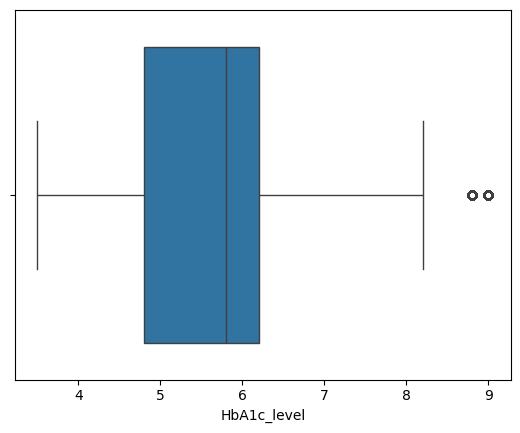

In [17]:
sns.boxplot(data=df1, x = 'HbA1c_level')

In [18]:
### Zscore
hb1ac_mean = df1.HbA1c_level.mean()
hb1ac_std = df1.HbA1c_level.std()
hb1ac_zscore = (df1.HbA1c_level - hb1ac_mean) / hb1ac_std
print(f"Outlier below zscore < -3: {(hb1ac_zscore < -3).sum()}")
print(f"Outlier above zscore  > 3: {(hb1ac_zscore > 3).sum()}")

Outlier below zscore < -3: 0
Outlier above zscore  > 3: 1315


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  99995 non-null   float64
 2   hypertension         99999 non-null   float64
 3   heart_disease        99999 non-null   float64
 4   smoking_history      100000 non-null  object 
 5   bmi                  99998 non-null   float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  99999 non-null   float64
 8   diabetes             100000 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 6.9+ MB


### Variables: 
    - Numerical
        - Discrete Variables : Integer /whole number
        - Continous Variables : Decimal (float,Dobule)
    - Categorical:
        - Ordinal Variables: Single Variable Grades in the class (A,B,C,D,E)
        - Nominal Variables: More than one character (Country name, State Name, City Name)
    

<Axes: >

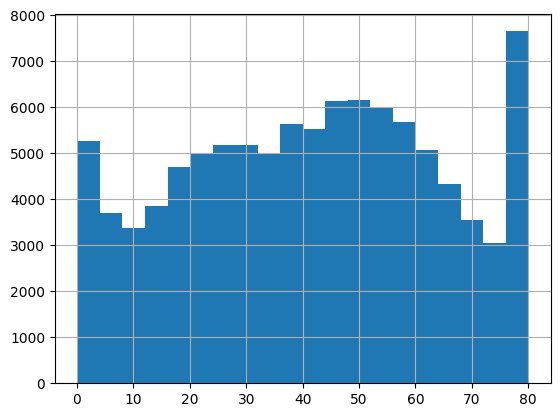

In [20]:
df1.age.hist(bins=20)

In [21]:
# Univariate Analysis
df1.sort_values('age',inplace=True)

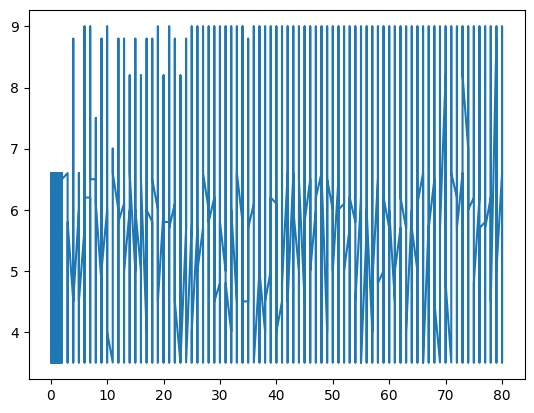

In [22]:
# Bi-variate Analysis
plt.plot(df1.age.to_numpy(),df1.HbA1c_level.to_numpy())

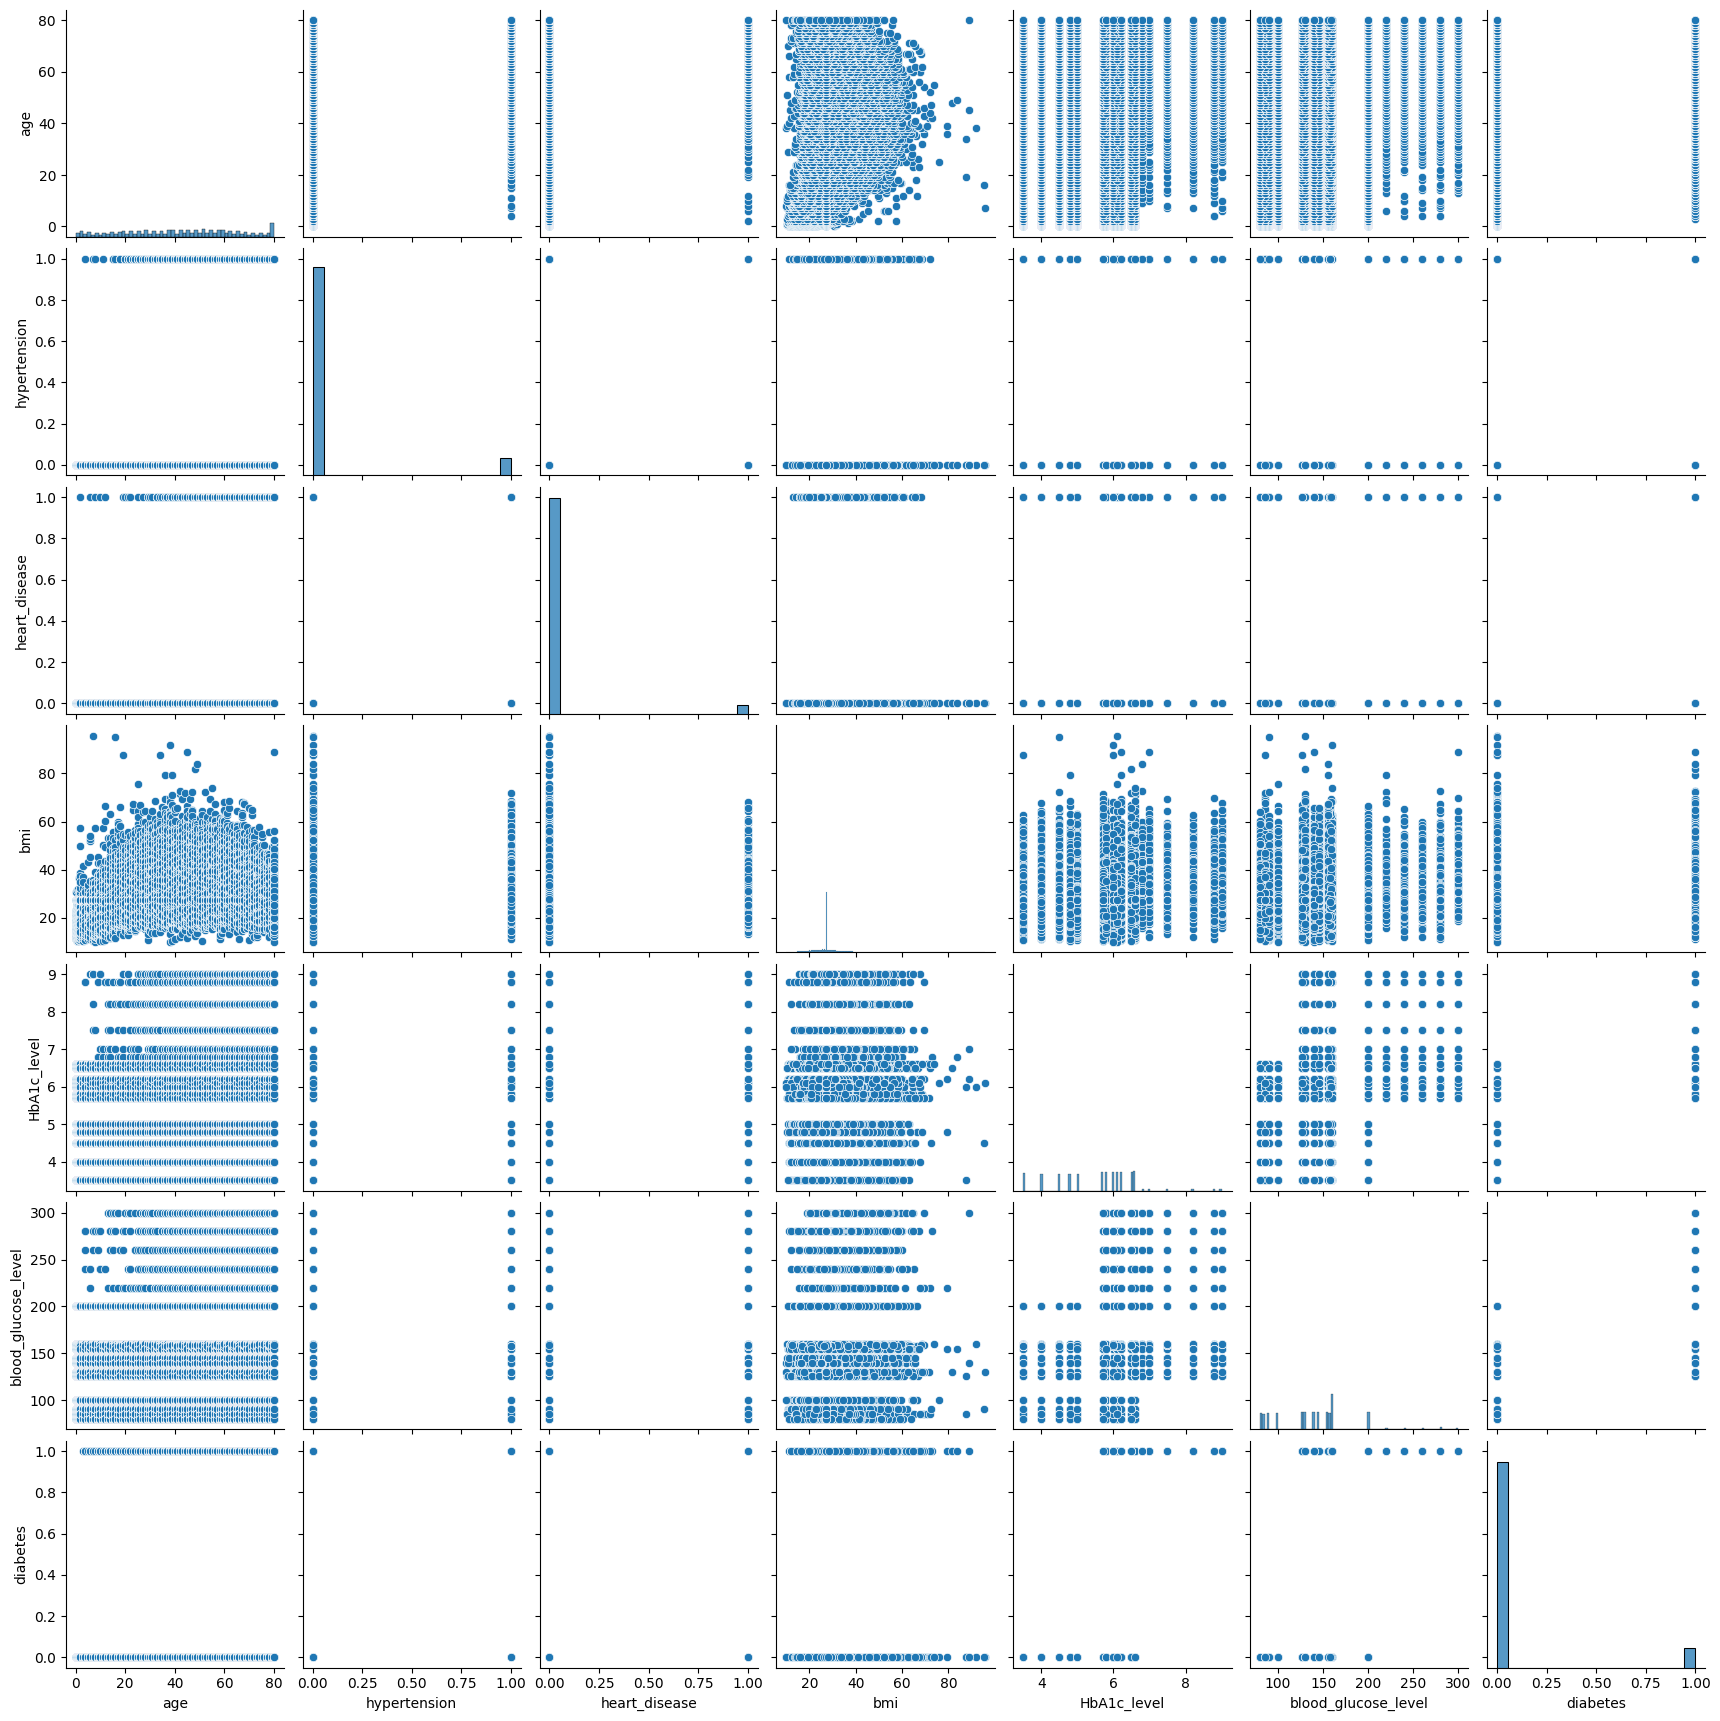

In [23]:
# Multivariate analysis
sns.pairplot(data=df1)